![](chapter-2-cover.png)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit
from math import exp

# Chapter 2: The Law of Diminishing Returns

> *Keywords for this chapter: Diminishing Returns, Marginal Returns, Marginal ROAS, Market Saturation*

## The Non-linearity of Investments

An interesting behavior can be noticed on the $ROAS$ calculation: we expect that the $CLV$ of our customers is stable, whilst this is not the same for the $CAC$. Consequently, there is a point on which investing more will give no returns, for instance, when $ROAS <1$. That's exactly why our $ROAS$ will tend to zero.

Several economists have studied why that is the case, but one known factor is marketing saturation. An interesting case that illustrates this is what happened to a magazine called *Sports Illustrated* published for the first time in 1954. Since its first publication it started to increase until reach 3.5 million subscribers by the end of 1980s. One can imagine that decades later it may have doubled the amount of subscribers. Interestingly, after many years of investment it reached its natural limit (3.5 million) a where it remained at least until 2000s. Thomas G. Osenton author of *Death of Demand* explains this very briefly:

```{epigraph}
"Every product or service has a natural consumption level. We just don't know what it is until we launch it, distribute it, and promote it for a generation's time (20 years or more) after which further investment to expand the universe beyond normal limits can be a futile exercise."

— Thomas G. Osenton
```

We cannot expect to keep investing and receiving a proportional return always, that means that the relationsip between our investment and return is not linear (e.g. $baseline + investment \times \text{return rate}$). In reality we expect the returns to diminish after some time, because we have saturated the market, otherwise our revenue would grow towards infinity. The equation 1.6 shows that with expected behavior, that is, $CAC$ increasing and our $CLV$ remaining roughly the same, the total return over our investment will reach a limit. Therefore, if we would plot the total return explained by our investment, we would see the function reaching a horizontal asymptote as our investment grows towards infinity. 

Furthermore, there are also cases that too little investments leads to lower returns than expected. An example of this is what happens on online markting, that often uses a bidding system to determine who will see which advertisement, in that scenario an underinvested campaign may suffer due to high competition. This will lead to low returns at low investment levels.

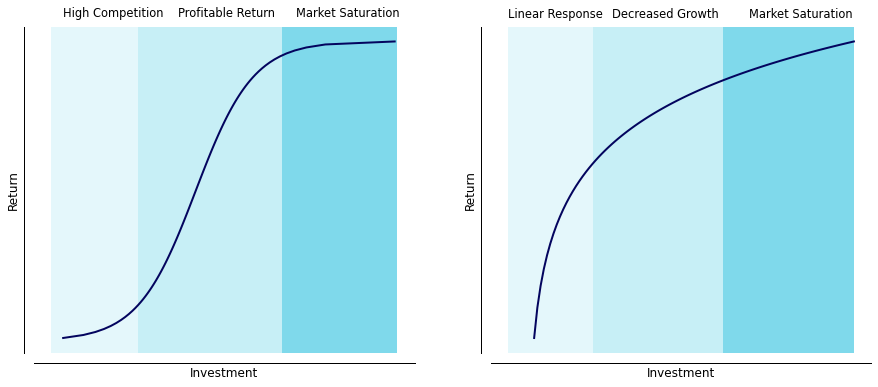

In [40]:
x = np.linspace (0.01, 0.999, num=100)
y = np.log (x/(1-x))
 
x_new = y
y_new = expit(x_new)

x_concave = np.linspace(1, 50, num=100)
y_concave = np.emath.logn(1.5, x_concave)

fig, axes = plt.subplots(figsize=(15,6), ncols=2, sharex=False, sharey=False)
axes[0].plot(x_new, y_new, linewidth=2, color='#03045E')
axes[0].axvspan(-5, -2, facecolor='#CAF0F8', alpha=0.5)
axes[0].axvspan(-2, 3, facecolor='#90E0EF', alpha=0.5)
axes[0].axvspan(3, 7, facecolor='#00B4D8', alpha=0.5)
axes[0].set_xlabel('Investment', fontsize=12)
axes[0].set_ylabel('Return', fontsize=12)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].text(-4.6, 1.08, 'High Competition', fontsize=11.5)
axes[0].text(-0.6, 1.08, 'Profitable Return', fontsize=11.5)
axes[0].text(3.5, 1.08, 'Market Saturation', fontsize=11.5)

axes[1].plot(x_concave, y_concave, linewidth=2, color='#03045E')
axes[1].set_xlabel('Investment', fontsize=12)
axes[1].set_ylabel('Return', fontsize=12)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].axvspan(-3, 10, facecolor='#CAF0F8', alpha=0.5)
axes[1].axvspan(10, 30, facecolor='#90E0EF', alpha=0.5)
axes[1].axvspan(30, 50, facecolor='#00B4D8', alpha=0.5)
axes[1].text(-3, 10.4, 'Linear Response', fontsize=11.5)
axes[1].text(13, 10.4, 'Decreased Growth', fontsize=11.5)
axes[1].text(34, 10.4, 'Market Saturation', fontsize=11.5)
sns.despine(offset=10, trim=True)
sns.set_context("paper")
plt.savefig('./fig/21.jpg', dpi=200, bbox_inches='tight')
plt.show()

:::{figure-md} markdown-fig
![investmentxreturn](./fig/21.jpg)

Left: S-shaped curve, represents businesses that has a slower growth at low level of investments, increases quickly and then saturates. Right: Concave curve, represents businesses that grows quickly at the first investments but after certain amount of investment grows at a decreasing rate.
:::

We can exemplify this with the curves shown in Fig 3, in each case can be seen a point on which investing further will lead to roughly no returns. In both cases there is a point on which the market is saturated and the $ROAS$ is not as it was when we started to invest. That makes sense, in most cases, when we start to invest the first people to convert are the ones that were more prone to be customers, meaning that they have a low $CAC$. Similarly we expect that as we keep investing, the easier to convert customer will already get converted and the ones that are not that prone to convert will require more effort (e.g. being exposed to an adverstisement more times) which in turn means a higher $CAC$. One can state then, by recalling equation $1.2$, that $CAC$ is a function of investment and customers acquired, thereby:

```{math}
\tag{2.1}\lim_{(Investment, CA) \to (+\infty, n)} CAC(Investment, CA) = \frac{Investment}{CA} = \frac{\infty}{n} = \infty
```

For $CA$ being the number of customers acquired, $n$ being any arbitrary maximum number of possible customers, and $CA, n \in I\!N$.

Naturaly, one can think on which point of the investment-return curve investing more starts to be unprofitable. The analysis of this will lead to an important concept.

## Marginal Returns

The question of whether one should keep investing has an intrinsic relationship with the future. Will I earn more if I invest more? What is the expected return for the next dollar invested? The answer to this questions often requires assuming that our investment-return function follows a parametric form, that is, an specific shape.

Let's take, for instance, the s-shaped growth curve in Fig 3. We can follow the rate of return by taking the first derivative of that same function. We can write it, for the sake of simplicity, as the standard logistic function:

```{math}
\tag{2.2} f(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{1+e^x}
```

Now, taking the first derivative it will give the rate of return for that function:

```{math}
\tag{2.3} \frac{d}{dx} f(x) = \frac{e^x}{(1+e^x)^2}
```

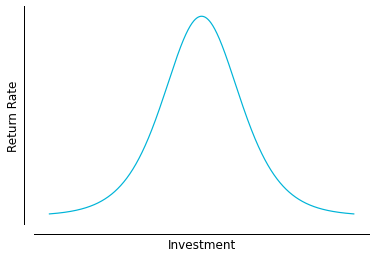

In [64]:
x = np.linspace (-6, 6, num=1000)
y = [exp(i)/((1+exp(i))**2) for i in x]

plt.subplots(figsize=(6,4))
sns.lineplot(x=x, y=y, color='#00B4D8')
plt.xticks([])
plt.yticks([])
plt.xlabel('Investment', fontsize=12)
plt.ylabel('Return Rate', fontsize=12)
sns.despine(offset=10, trim=True)
sns.set_context("paper")
plt.savefig('./fig/22.jpg', dpi=200, bbox_inches='tight')
plt.show()

If we plot that function (see Fig 4), we can see that there is a clear point of maximum return rate, and after that point that rate starts to decrease.

```{figure} ./fig/22.jpg
---
scale: 40%
align: center
---
Return rate by several different investments. In the center of the curve we can see the maximum return rate.
```

Now, let's think about these results for a little. If you recall the definition of derivative, you will remember that it is an infinitesimally small change in the $x$ variable which in turn produces an infinitesimal change in $y$ variable. Therefore, by taking the derivative of the investment-return curve, we are understanding how changing the investment will change the return. Recall from equation $1.4$ that the division between our $\text{Return}$ (also called as *campaign revenue*) and $\text{Spend}$ (also called *campaign spend*) is the definition of $\text{ROAS}$. Hence, we can see that by taking the derivative of that curve we are in fact getting the change in $\text{ROAS}$ for a given change in $\text{Investment}$. We call this change in $\text{ROAS}$ the *Marginal ROAS*, which we'll denote as $\text{mROAS}$. We can define then our $\text{mROAS}$ as:

```{math}
\tag{2.4} \text{mROAS} = \lim_{\delta \to 0}\frac{\text{Return}(\text{Investment} + \delta) - \text{Return}(\text{Investment})}{\delta}
```

The point on the curve on which our $\text{mROAS}=0$ is the moment that there is not change in the return if we increase the investment.

**Bibliography:**

1. Osenton, T. (2004). The Death of Demand: Finding Growth in a Saturated Global Economy. Financial Times Prentice Hall.

2. Pandey, Sandeep & Gupta, Snigdha & Chhajed, Shubham. (2021). Marketing Mix Modeling (MMM) -Concepts and Model Interpretation. International Journal of Engineering and Technical Research. 10. 784. 10.17577/IJERTV10IS060396. 